<a href="https://colab.research.google.com/github/luccosta/aerial-robot-rtos/blob/main/plot_temporal_diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection

plt.figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')

<Figure size 1600x960 with 0 Axes>

<Figure size 1600x960 with 0 Axes>

In [117]:
file = open("/content/log.txt")
raw_data = file.readline()

In [118]:
data_mod = raw_data.split(', ')

data_mod = list(map(lambda x: list(map(int, x.split())), data_mod))[:-1]

data_mod[:5]

[[2, 1, 1], [7, 2, 1], [14, 3, 1], [14, 3, 0], [7, 12, 0]]

In [119]:
data_aux = data_mod.copy()

data = []

stack = []
ativa = (0, 0)
for d in data_aux:

    # Ajuste da não ocorrência de algumas tasks
    if d[0] > 12:
        d[0] -= 3
    elif d[0] > 8:
        d[0] -= 1

    if d[2] == 1:
        if ativa[0] != 0:
            data.append((ativa[0], ativa[1], d[1]))
            stack.append(ativa[0])

            ativa = (d[0], d[1])
        else:
            data.append((12, ativa[1], d[1]))
            ativa = (d[0], d[1])
    else:
        if d[0] != ativa[0]: # Correção de bug
            stack.pop()
        else:
            #assert d[0] == ativa[0], str(d) + '\n' + str(ativa) + '\n'
            data.append((ativa[0], ativa[1], d[1]))

            if len(stack) != 0:
                ativa = (stack.pop(), d[1])
            else:
                ativa = (0, d[1])

[2, 308, 0]
(11, 303)
[2]
[2, 408, 0]
(11, 403)
[2]
[2, 508, 0]
(11, 503)
[2]
[2, 608, 0]
(11, 603)
[2]
[2, 708, 0]
(11, 703)
[2]
[2, 808, 0]
(11, 803)
[2]
[2, 908, 0]
(11, 903)
[2]
[2, 1008, 0]
(11, 1003)
[2]
[2, 1108, 0]
(11, 1103)
[1, 2]
[2, 1208, 0]
(11, 1203)
[1, 2]
[2, 1308, 0]
(11, 1303)
[2]
[2, 1408, 0]
(11, 1403)
[2]
[2, 1508, 0]
(11, 1503)
[2]
[2, 1608, 0]
(11, 1603)
[2]
[2, 1708, 0]
(11, 1703)
[2]
[2, 1808, 0]
(11, 1803)
[2]
[2, 1908, 0]
(11, 1903)
[2]
[3, 4869, 0]
(7, 4866)
[3]
[11, 6510, 0]
(2, 6508)
[7, 11]
[3, 14608, 0]
(11, 14603)
[3]
[3, 14708, 0]
(11, 14703)
[3]
[3, 14808, 0]
(11, 14803)
[3]


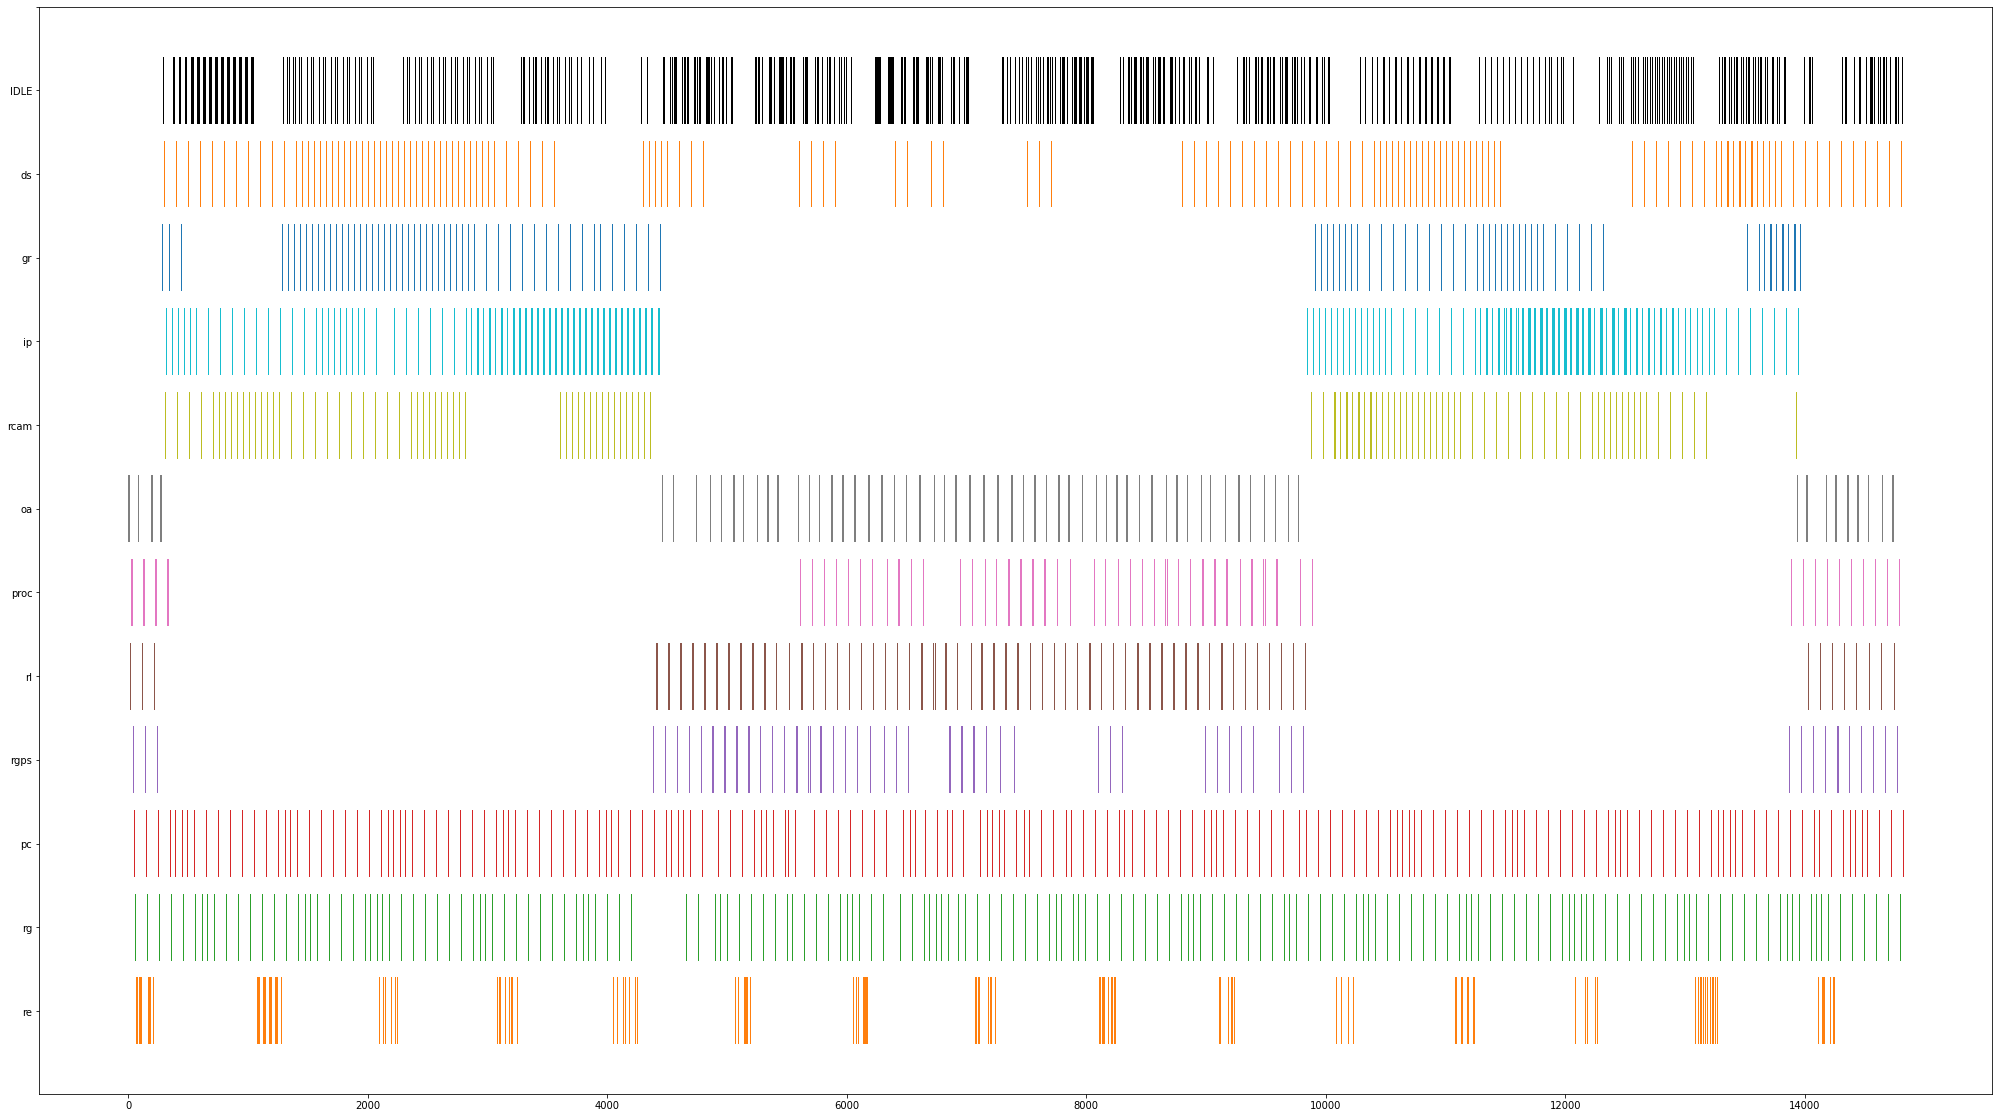

In [121]:
def block(id, i, f):
    return [(i, id - .4),
            (i, id + .4),
            (f, id + .4),
            (f, id - .4),
            (i, id - .4)]

tasks = ['re', 'rg', 'pc', 'rgps', 'rl', 'proc', 'oa',
         'rcam', 'ip', 'gr', 'ds', 'IDLE']

colormapping = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7",
                "C8", "C9", "C10", "C11", "k"]

verts = []
colors = []
for d in data:
    v =  block(*d)
    verts.append(v)
    colors.append(colormapping[d[0]])

bars = PolyCollection(verts, facecolors=colors)
fig, ax = plt.subplots(figsize=(35, 20))
ax.add_collection(bars)
ax.autoscale()

ax.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
ax.set_yticklabels(tasks)
plt.show()